In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from imblearn.over_sampling import ADASYN
from collections import Counter


### Load datasets

In [2]:
df_leukemia = pd.read_csv('C:/Class/HK6/IPrj/Datasets/Leukemia_GSE28497.csv')
df_leukemia

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM705467.CEL.gz,B-CELL_ALL,7.409521,5.009216,4.173607,7.315369,3.185411,7.620644,3.731541,3.471587,...,2.968822,3.223820,11.968681,12.100004,3.457507,2.967138,2.790814,2.563377,2.860505,2.608381
1,GSM705468.CEL.gz,B-CELL_ALL,7.177109,5.415108,4.426778,7.550818,3.134181,7.685723,3.907953,3.650995,...,2.982888,3.690411,12.318004,12.486741,3.396412,3.109629,2.856499,2.603355,2.908509,2.634063
2,GSM705469.CEL.gz,B-CELL_ALL,6.564918,5.248020,4.252414,7.175169,3.017718,7.956261,3.354557,3.302989,...,2.897425,3.611584,11.748222,11.807578,3.265585,3.057079,2.724642,2.440532,2.626871,2.673293
3,GSM705470.CEL.gz,B-CELL_ALL,6.872028,5.155963,4.388849,7.365933,3.031735,7.830002,3.508926,3.412491,...,3.024722,3.713087,12.208588,12.148604,3.175092,2.896168,2.798296,2.522343,2.762835,2.624163
4,GSM705471.CEL.gz,B-CELL_ALL,7.402105,5.509826,4.284291,7.214947,2.925269,7.789838,3.610425,3.362593,...,3.259802,4.096010,11.641305,11.713311,3.507025,3.119397,2.761294,2.546541,2.748511,2.738165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,GSM706002.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.692887,4.736595,4.503892,7.484208,3.137376,7.917993,3.858845,3.341846,...,3.215936,3.801296,12.292519,12.288550,3.402729,3.042387,2.965890,2.528686,2.705429,2.762513
277,GSM706003.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.209500,4.566413,4.637307,7.348777,3.018984,6.423441,3.669993,3.406887,...,3.266234,3.873540,11.971540,12.035205,3.321740,3.030698,2.826285,2.573647,2.942468,2.666361
278,GSM706004.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.046964,5.252467,4.420044,7.086734,2.913081,7.723025,3.474380,3.309239,...,3.150403,3.756845,11.977577,11.719864,3.541711,2.959812,2.760271,2.514172,2.811914,2.697337
279,GSM706005.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.347403,4.903981,4.281019,6.989415,2.968945,7.618195,3.492828,3.266248,...,3.204594,3.918882,11.936382,12.019612,3.383822,2.864419,2.739536,2.585459,2.710848,2.769975


### Visulization and Explore Data

In [3]:
df_leukemia = df_leukemia.drop(columns = 'samples')

In [38]:
df_leukemia.isnull().sum().sum()

0

In [39]:
df_leukemia.duplicated().sum()

0

In [40]:
df_leukemia.type.value_counts()

type
B-CELL_ALL               74
B-CELL_ALL_ETV6-RUNX1    53
B-CELL_ALL_HYPERDIP      51
B-CELL_ALL_T-ALL         46
B-CELL_ALL_TCF3-PBX1     22
B-CELL_ALL_HYPO          18
B-CELL_ALL_MLL           17
Name: count, dtype: int64

In [41]:
df_leukemia.type.value_counts().sum()

281

In [42]:
df_leukemia.dtypes

type                object
1007_s_at          float64
1053_at            float64
117_at             float64
121_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 22284, dtype: object

In [11]:
# change type to categoric variable
df_leukemia["type"] = df_leukemia["type"].replace({"B-CELL_ALL" : 0,
                                                   "B-CELL_ALL_ETV6-RUNX1" : 1,
                                                   "B-CELL_ALL_HYPERDIP" : 2,
                                                   "B-CELL_ALL_T-ALL": 3,
                                                   "B-CELL_ALL_TCF3-PBX1" : 4,
                                                   "B-CELL_ALL_HYPO" : 5,
                                                   "B-CELL_ALL_MLL": 6,
                                                   })

#df_leukemia["type"] = df_leukemia["type"].astype("category")

C:\Users\Kim_Ngan\AppData\Local\Temp\ipykernel_61200\954011344.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_leukemia["type"] = df_leukemia["type"].replace({"B-CELL_ALL" : 0,


In [12]:
df_leukemia["type"].unique()

array([0, 4, 2, 5, 6, 3, 1], dtype=int64)

In [4]:
df_leukemia

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,B-CELL_ALL,7.409521,5.009216,4.173607,7.315369,3.185411,7.620644,3.731541,3.471587,4.167374,...,2.968822,3.223820,11.968681,12.100004,3.457507,2.967138,2.790814,2.563377,2.860505,2.608381
1,B-CELL_ALL,7.177109,5.415108,4.426778,7.550818,3.134181,7.685723,3.907953,3.650995,3.860015,...,2.982888,3.690411,12.318004,12.486741,3.396412,3.109629,2.856499,2.603355,2.908509,2.634063
2,B-CELL_ALL,6.564918,5.248020,4.252414,7.175169,3.017718,7.956261,3.354557,3.302989,3.335324,...,2.897425,3.611584,11.748222,11.807578,3.265585,3.057079,2.724642,2.440532,2.626871,2.673293
3,B-CELL_ALL,6.872028,5.155963,4.388849,7.365933,3.031735,7.830002,3.508926,3.412491,3.439769,...,3.024722,3.713087,12.208588,12.148604,3.175092,2.896168,2.798296,2.522343,2.762835,2.624163
4,B-CELL_ALL,7.402105,5.509826,4.284291,7.214947,2.925269,7.789838,3.610425,3.362593,3.412095,...,3.259802,4.096010,11.641305,11.713311,3.507025,3.119397,2.761294,2.546541,2.748511,2.738165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,B-CELL_ALL_ETV6-RUNX1,6.692887,4.736595,4.503892,7.484208,3.137376,7.917993,3.858845,3.341846,3.731238,...,3.215936,3.801296,12.292519,12.288550,3.402729,3.042387,2.965890,2.528686,2.705429,2.762513
277,B-CELL_ALL_ETV6-RUNX1,6.209500,4.566413,4.637307,7.348777,3.018984,6.423441,3.669993,3.406887,5.179208,...,3.266234,3.873540,11.971540,12.035205,3.321740,3.030698,2.826285,2.573647,2.942468,2.666361
278,B-CELL_ALL_ETV6-RUNX1,6.046964,5.252467,4.420044,7.086734,2.913081,7.723025,3.474380,3.309239,6.102405,...,3.150403,3.756845,11.977577,11.719864,3.541711,2.959812,2.760271,2.514172,2.811914,2.697337
279,B-CELL_ALL_ETV6-RUNX1,6.347403,4.903981,4.281019,6.989415,2.968945,7.618195,3.492828,3.266248,5.192811,...,3.204594,3.918882,11.936382,12.019612,3.383822,2.864419,2.739536,2.585459,2.710848,2.769975


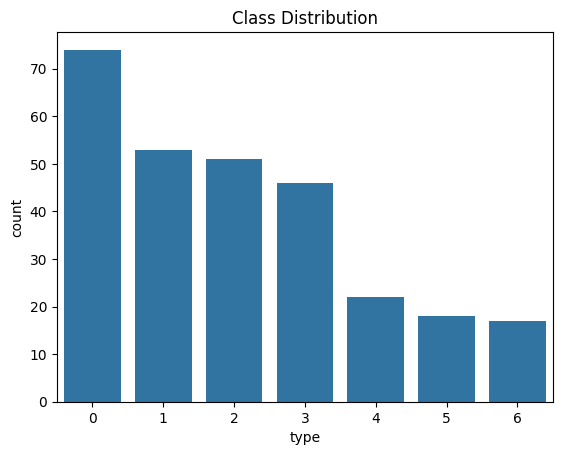

In [46]:
sns.countplot(x=df_leukemia['type'])
plt.title("Class Distribution")
plt.show()

The chart shows that this is imbalance data, which will lead to majority class in training model for prediction

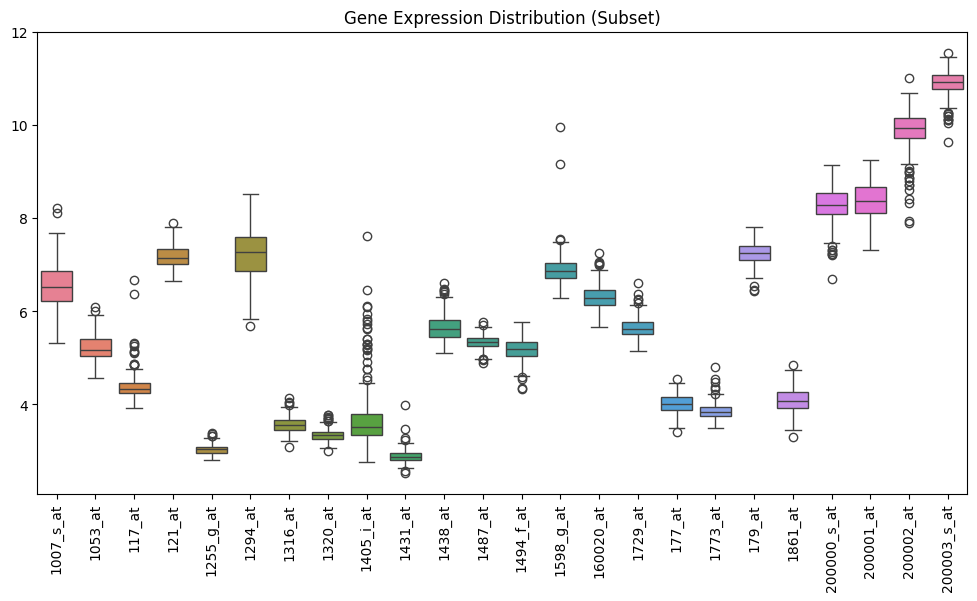

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_leukemia.iloc[:, 1:25])  
plt.xticks(rotation=90)
plt.title("Gene Expression Distribution (Subset)")
plt.show()

The chart shows that data had more outlier, which indicates the values have a big variationt

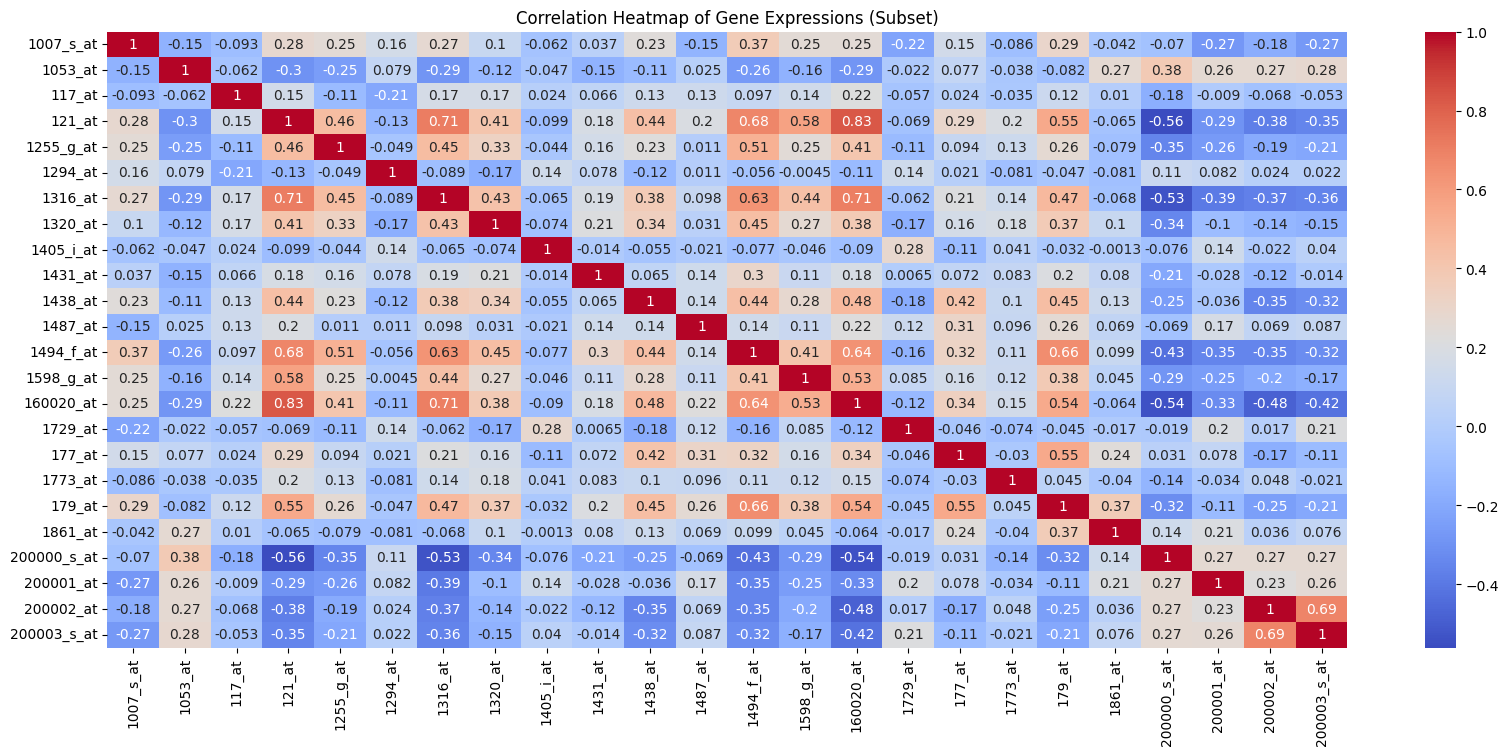

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(df_leukemia.iloc[:, 1:25].corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Gene Expressions (Subset)")
plt.show()

In [49]:
# (assuming that "high correlation" means a pearson value of >= 0.7) 
# The highly correlated variables are: 
# 1316_at and 121_at
# 160020_at and 121_at
# 160020_at and 1316_at, 

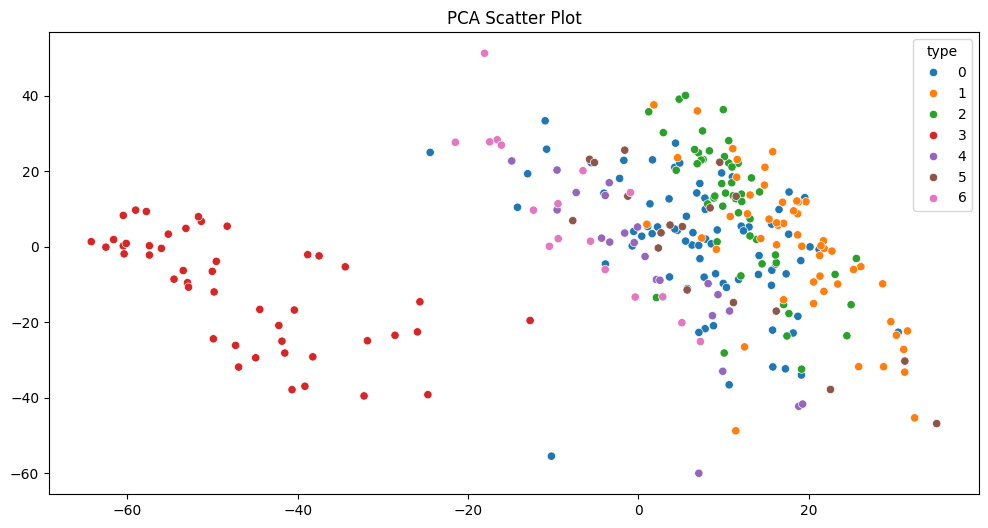

In [50]:
from sklearn.decomposition import PCA
X = df_leukemia.iloc[:,1:]  # Exclude 'type'
y = df_leukemia['type']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.title("PCA Scatter Plot")
plt.show()


The red cluster (type 3) is clearly separated from all other groups, which may indicate a unique leukemia subtype

The others are overlap, meaning their gene expression differences are not as strong

### Preprocessing data

In [13]:
X = df_leukemia.drop(columns = 'type')
X

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,7.409521,5.009216,4.173607,7.315369,3.185411,7.620644,3.731541,3.471587,4.167374,2.873572,...,2.968822,3.223820,11.968681,12.100004,3.457507,2.967138,2.790814,2.563377,2.860505,2.608381
1,7.177109,5.415108,4.426778,7.550818,3.134181,7.685723,3.907953,3.650995,3.860015,2.900938,...,2.982888,3.690411,12.318004,12.486741,3.396412,3.109629,2.856499,2.603355,2.908509,2.634063
2,6.564918,5.248020,4.252414,7.175169,3.017718,7.956261,3.354557,3.302989,3.335324,2.811931,...,2.897425,3.611584,11.748222,11.807578,3.265585,3.057079,2.724642,2.440532,2.626871,2.673293
3,6.872028,5.155963,4.388849,7.365933,3.031735,7.830002,3.508926,3.412491,3.439769,2.910715,...,3.024722,3.713087,12.208588,12.148604,3.175092,2.896168,2.798296,2.522343,2.762835,2.624163
4,7.402105,5.509826,4.284291,7.214947,2.925269,7.789838,3.610425,3.362593,3.412095,2.876959,...,3.259802,4.096010,11.641305,11.713311,3.507025,3.119397,2.761294,2.546541,2.748511,2.738165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,6.692887,4.736595,4.503892,7.484208,3.137376,7.917993,3.858845,3.341846,3.731238,3.059978,...,3.215936,3.801296,12.292519,12.288550,3.402729,3.042387,2.965890,2.528686,2.705429,2.762513
277,6.209500,4.566413,4.637307,7.348777,3.018984,6.423441,3.669993,3.406887,5.179208,2.972267,...,3.266234,3.873540,11.971540,12.035205,3.321740,3.030698,2.826285,2.573647,2.942468,2.666361
278,6.046964,5.252467,4.420044,7.086734,2.913081,7.723025,3.474380,3.309239,6.102405,2.921302,...,3.150403,3.756845,11.977577,11.719864,3.541711,2.959812,2.760271,2.514172,2.811914,2.697337
279,6.347403,4.903981,4.281019,6.989415,2.968945,7.618195,3.492828,3.266248,5.192811,2.871212,...,3.204594,3.918882,11.936382,12.019612,3.383822,2.864419,2.739536,2.585459,2.710848,2.769975


In [14]:
y = df_leukemia['type']
y

0      0
1      0
2      0
3      0
4      0
      ..
276    1
277    1
278    1
279    1
280    1
Name: type, Length: 281, dtype: int64